<a href="https://colab.research.google.com/github/KoMurase/Learning_my_interest/blob/master/Ffilm_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
!pip install imagehash

In [43]:
!ls

drive  sample_data


In [44]:
!pwd

/content


In [45]:
!ls

drive  sample_data


In [0]:
#!unzip input.zip

In [0]:
import pandas as pd 
label = pd.read_csv('/content/drive/My Drive/ffilm/input/train_labels.csv',names=('img','age'))

In [48]:
label.head()

,img,age
0,train_0001.png,2012
1,train_0002.png,2003
2,train_0003.png,1994
3,train_0004.png,2014
4,train_0005.png,2003


Text(0, 0.5, 'Count')

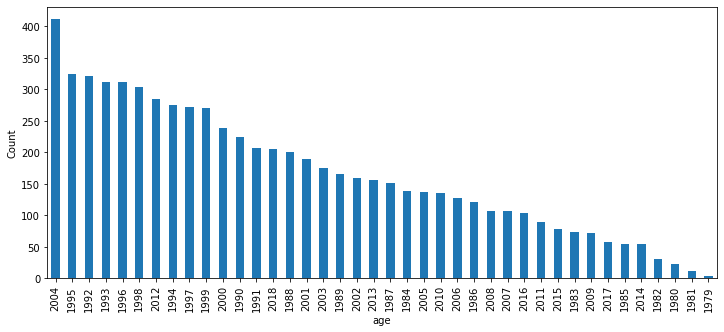

In [49]:
ax = label['age'].value_counts().plot(kind='bar', figsize=(12, 5))
ax.set_xlabel('age')
ax.set_ylabel('Count')

In [50]:
label['age'].value_counts().sum()

6686

In [51]:
train_labels = label['age'].values
train_labels

array([2012, 2003, 1994, ..., 1988, 1999, 2004])

In [52]:
 """ #画像フォルダにある画像をndarrayとして読み込む

import glob
import numpy as np
from keras.preprocessing.image import load_img,img_to_array

#image  array size
img_size = (224,224)
#load images Folder
dir_name = '/content/drive/My Drive/ffilm/input/train_images'
#File type
file_type  = 'png'

#lフォルダ内のファイルパスをリスト化
img_list = glob.glob(dir_name + '/*.' + file_type)
#保存先の配列を確保
temp_img_array_list = []

#ファイルパスのリストを元に画像を配列化
for img in img_list:
    #画像を224x224にリサイズ
    temp_img = load_img(img,grayscale=False,target_size=(img_size))
    #PIL形式からNumpy配列に変換と正規化
    temp_img_array = img_to_array(temp_img) /255
    #変換したNumpy配列を末尾に追加
    temp_img_array_list.append(temp_img_array)

#Numpy配列をリスト化(*,224,224,3)
train_img_array_list = np.array(temp_img_array_list)

#save np.array
np.savez(dir_name+'.npz',train_img_array_list)
"""

" #画像フォルダにある画像をndarrayとして読み込む\n\nimport glob\nimport numpy as np\nfrom keras.preprocessing.image import load_img,img_to_array\n\n#image  array size\nimg_size = (224,224)\n#load images Folder\ndir_name = '/content/drive/My Drive/ffilm/input/train_images'\n#File type\nfile_type  = 'png'\n\n#lフォルダ内のファイルパスをリスト化\nimg_list = glob.glob(dir_name + '/*.' + file_type)\n#保存先の配列を確保\ntemp_img_array_list = []\n\n#ファイルパスのリストを元に画像を配列化\nfor img in img_list:\n   #画像を224x224にリサイズ\n   temp_img = load_img(img,grayscale=False,target_size=(img_size))\n   #PIL形式からNumpy配列に変換と正規化\n   temp_img_array = img_to_array(temp_img) /255\n   #変換したNumpy配列を末尾に追加\n   temp_img_array_list.append(temp_img_array)\n\n#Numpy配列をリスト化(*,224,224,3)\ntrain_img_array_list = np.array(temp_img_array_list)\n\n#save np.array\nnp.savez(dir_name+'.npz',train_img_array_list)\n"

In [53]:
"""
#load images Folder
dir_name = '/content/drive/My Drive/ffilm/input/test_images'

#lフォルダ内のファイルパスをリスト化
img_list = glob.glob(dir_name + '/*.' + file_type)
#保存先の配列を確保
temp_img_array_list = []

#ファイルパスのリストを元に画像を配列化
for img in img_list:
    #画像を224x224にリサイズ
    temp_img = load_img(img,grayscale=False,target_size=(img_size))
    #PIL形式からNumpy配列に変換と正規化
    temp_img_array = img_to_array(temp_img) /255
    #変換したNumpy配列を末尾に追加
    temp_img_array_list.append(temp_img_array)

#Numpy配列をリスト化(*,224,224,3)
test_img_array_list = np.array(temp_img_array_list)

#save np.array
np.savez(dir_name+'.npz',test_img_array_list)
"""

"\n#load images Folder\ndir_name = '/content/drive/My Drive/ffilm/input/test_images'\n\n#lフォルダ内のファイルパスをリスト化\nimg_list = glob.glob(dir_name + '/*.' + file_type)\n#保存先の配列を確保\ntemp_img_array_list = []\n\n#ファイルパスのリストを元に画像を配列化\nfor img in img_list:\n    #画像を224x224にリサイズ\n    temp_img = load_img(img,grayscale=False,target_size=(img_size))\n    #PIL形式からNumpy配列に変換と正規化\n    temp_img_array = img_to_array(temp_img) /255\n    #変換したNumpy配列を末尾に追加\n    temp_img_array_list.append(temp_img_array)\n\n#Numpy配列をリスト化(*,224,224,3)\ntest_img_array_list = np.array(temp_img_array_list)\n\n#save np.array\nnp.savez(dir_name+'.npz',test_img_array_list)\n"

In [54]:
""" import google.colab

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

import torch.cuda
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd
import torch.utils.data as dataset
import torchvision.models as models

import albumentations
import imagehash
import argparse
import os
import tqdm
import random
import csv

RANDOM_SEED = 2019

random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

torch.torch.backends.cudnn.benchmark = True
torch.torch.backends.cudnn.enabled = True

"""

" import google.colab\n\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom PIL import Image\nfrom sklearn.model_selection import train_test_split\n\nimport torch.cuda\nimport torch.nn as nn\nimport torch.optim as optim\nimport torch.autograd as autograd\nimport torch.utils.data as dataset\nimport torchvision.models as models\n\nimport albumentations\nimport imagehash\nimport argparse\nimport os\nimport tqdm\nimport random\nimport csv\n\nRANDOM_SEED = 2019\n\nrandom.seed(RANDOM_SEED)\nos.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)\nnp.random.seed(RANDOM_SEED)\ntorch.manual_seed(RANDOM_SEED)\ntorch.cuda.manual_seed(RANDOM_SEED)\n\ntorch.torch.backends.cudnn.benchmark = True\ntorch.torch.backends.cudnn.enabled = True\n\n"

In [55]:
"""
DATA_DIR = '/content/drive/My Drive/ffilm/input/'
#train_labels = np.load(os.path.join(DATA_DIR, 'ukiyoe-train-labels.npz'))['arr_0']
train_images = np.load(DATA_DIR+'train_images.npy')
test_images = np.load(DATA_DIR+'test_images.npz'))['arr_0']
print('train-labels: shape={}, dtype={}'.format(train_labels.shape, train_labels.dtype))
print('train-images: shape={}, dtype={}'.format(train_images.shape, train_images.dtype))
print('test-images: shape={}, dtype={}'.format(test_images.shape, test_images.dtype))

"""

"\nDATA_DIR = '/content/drive/My Drive/ffilm/input/'\n#train_labels = np.load(os.path.join(DATA_DIR, 'ukiyoe-train-labels.npz'))['arr_0']\ntrain_images = np.load(DATA_DIR+'train_images.npy')\ntest_images = np.load(DATA_DIR+'test_images.npz'))['arr_0']\nprint('train-labels: shape={}, dtype={}'.format(train_labels.shape, train_labels.dtype))\nprint('train-images: shape={}, dtype={}'.format(train_images.shape, train_images.dtype))\nprint('test-images: shape={}, dtype={}'.format(test_images.shape, test_images.dtype))\n\n"

In [0]:
import glob 
import os.path as osp 
import random 
import numpy as np 
import json 
from PIL import Image 
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
import matplotlib.pyplot as plt 
%matplotlib inline 

import torch 
import torch.nn as nn 
import torch.optim as optim 
import torch.utils.data as data 
import torchvision 
from torchvision import models , transforms

In [0]:
import os
import urllib.request
import zipfile
import glob 
import os.path as osp 
import random 
import numpy as np 
import json 
from PIL import Image 
from tqdm import tqdm 
import matplotlib.pyplot as plt 
%matplotlib inline 

import torch 
import torch.nn as nn 
import torch.optim as optim 
import torch.utils.data as data 
import torchvision 
from torchvision import models , transforms


In [78]:
#画像のファイルパスを作成する
def make_datapath_list(phase='train'):
  rootpath ='/content/drive/My Drive/ffilm/input/'
  #age_list=label['age'].values
  target_path = osp.join(rootpath+phase+'/*.png')
  print(target_path)
  
  path_list = []
  
  #globを利用してサブディレクトリまでパスを取得する
  for path in glob.glob(target_path):
    path_list.append(path)
  
  return path_list

#実行
train_list = make_datapath_list(phase='train_images')
test_list = make_datapath_list(phase='test_images')


/content/drive/My Drive/ffilm/input/train_images/*.png
/content/drive/My Drive/ffilm/input/test_images/*.png


In [0]:
class ImageTransform():
    def __init__(self, resize, mean, std):
        self.data_transform = {
            'train': transforms.Compose([
                transforms.RandomResizedCrop(
                    resize, scale=(0.5, 1.0)),  # データオーギュメンテーション
                transforms.RandomHorizontalFlip(),  # データオーギュメンテーション
                transforms.ToTensor(),  # テンソルに変換
                transforms.Normalize(mean, std)  # 標準化
            ]),
            'val': transforms.Compose([
                transforms.Resize(resize),  # リサイズ
                transforms.CenterCrop(resize),  # 画像中央をresize×resizeで切り取り
                transforms.ToTensor(),  # テンソルに変換
                transforms.Normalize(mean, std)  # 標準化
            ])
        }

    def __call__(self, img, phase='train'):
        
        return self.data_transform[phase](img)

In [60]:
import cv2

im = cv2.imread('/content/drive/My Drive/ffilm/input/train_images/train_0100.png')

print(type(im))
print(im.shape)
print(type(im.shape))


<class 'numpy.ndarray'>
(256, 256, 3)
<class 'tuple'>


In [61]:
size = 224
mean = (0.485,0.456,0.406)
std = (0.229,0.224,0.225)

#Datasetの作成

class Dataset(data.Dataset):
  """
  PytorchのDatasetクラスを継承
  """
  def __init__(self,file_list, labels,transform=None,phase='train'):
    self.labels= labels
    self.file_list = file_list
    self.transform = transform 
    self.phase = phase
    
  def __len__(self):
    """画像の枚数を返す"""
    return len(self.file_list)
  
  def __getitem__(self,index):
    '''
    前処理をした画像のTensoor形式のデータとラベルを取得
    '''
    img_path = self.file_list[index]
    img = Image.open(img_path)
    
    #画像の前処理を実施
    img_transformed = self.transform(
        img, self.phase
    ) #torch.Size([3,224,224])
    
    #画像のラベルをファイル名から抜き出す
    #if self.phase == 'train':
    #  label = img_path[54:57] #train/の後の　catかdogを入れたい
    #elif self.phase == 'val':
    #  label = img_path[52:55] #val/の後の　catかdogを入れたい
    
    #ラベルを数値に変換
    #if label == 'cat':
    #  label = 0
    #elif label == 'dog':
    #  label = 1
    label = self.labels[index] -1979
      
    return img_transformed, label

train_x, valid_x, train_y, valid_y = train_test_split(
  train_list ,train_labels, test_size=0.5, random_state=4869
  )

 #実行
train_dataset = Dataset(
      file_list = train_x, labels=train_y, transform=ImageTransform(size,mean,std),phase='train'
    )
val_dataset = Dataset(
      file_list = valid_x, labels=valid_y, transform=ImageTransform(size,mean,std),phase='val'
    )
    
#indexの確認
index = 0
print(train_dataset.__getitem__(index)[0].size())
print(train_dataset.__getitem__(index)[1])
#print(len('/content/drive/My Drive/ffilm/input/train_images/'))
#print(len('/content/drive/My Drive/ffilm/input/train_images/'))


torch.Size([3, 224, 224])
39


In [62]:
len(train_dataset)

3343

In [63]:
len(val_dataset)

3343

In [64]:
train_dataset[0]

(tensor([[[ 1.4440,  1.4440,  1.4783,  ...,  1.7009,  1.0331,  0.6392],
          [ 1.5639,  1.6324,  1.5810,  ...,  2.0777,  1.8379,  1.6495],
          [ 1.7180,  1.7180,  1.7352,  ...,  2.2318,  2.1975,  2.1975],
          ...,
          [-1.8953, -1.8268, -1.8439,  ..., -1.3473, -1.4672, -1.6042],
          [-1.8439, -1.8439, -1.8439,  ..., -1.4843, -1.5014, -1.4843],
          [-1.8439, -1.8268, -1.8610,  ..., -1.1247, -1.1075, -1.0562]],
 
         [[-1.0378, -1.0378, -1.0553,  ...,  1.2381,  0.4678,  0.0476],
          [-0.9153, -0.8452, -0.9503,  ...,  1.6758,  1.3957,  1.2906],
          [-0.7227, -0.7227, -0.7227,  ...,  1.9384,  1.9384,  2.0609],
          ...,
          [-1.7556, -1.6681, -1.6856,  ..., -0.6877, -0.7577, -0.8978],
          [-1.6856, -1.7031, -1.7381,  ..., -0.7927, -0.7927, -0.7752],
          [-1.6856, -1.7031, -1.7731,  ..., -0.3901, -0.3725, -0.3025]],
 
         [[-0.7238, -0.7064, -0.6890,  ...,  0.6879, -0.1835, -0.6018],
          [-0.5495, -0.4450,

In [65]:
# ミニバッチのサイズを指定
batch_size = 32

# DataLoaderを作成
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=True)

# 辞書型変数にまとめる
dataloaders_dict = {"train": train_dataloader,"val": val_dataloader}

# 動作確認
batch_iterator = iter(dataloaders_dict["train"])  # イテレータに変換
inputs, labels = next(
    batch_iterator)  # 1番目の要素を取り出す
print(inputs.size())
print(labels)
print(len(labels))


batch_iterator = iter(dataloaders_dict["val"])  # イテレータに変換
inputs, labels = next(
    batch_iterator)  # 1番目の要素を取り出す
print(inputs.size())
print(labels)
print(len(labels))

torch.Size([32, 3, 224, 224])
tensor([31, 19, 29, 20, 21, 20, 35, 27, 18, 25,  7, 17, 13,  3, 10, 20, 10, 24,
        21, 34, 15,  5, 15, 22, 32, 39, 10, 16, 17, 33, 34,  9])
32
torch.Size([32, 3, 224, 224])
tensor([15,  6,  7, 26, 18, 39, 13, 11, 25, 13,  3, 21, 39, 12, 14, 11, 24, 16,
        19, 23, 29, 10, 17, 26, 12, 23, 38, 16, 10, 31, 24, 34])
32


In [0]:
# 学習済みのVGG-16モデルをロード
# VGG-16モデルのインスタンスを生成
use_pretrained = True  # 学習済みのパラメータを使用
net = models.vgg16(pretrained=use_pretrained)

In [67]:


# VGG16の最後の出力層の出力ユニットを付け替える
net.classifier[6] = nn.Linear(in_features=4096, out_features=40)

# 訓練モードに設定
net.train()

print('ネットワーク設定完了：学習済みの重みをロードし、訓練モードに設定しました')

ネットワーク設定完了：学習済みの重みをロードし、訓練モードに設定しました


In [0]:
#損失関数を定義
criterion = nn.CrossEntropyLoss()

In [69]:
#転移学習で学習させるパラメータを変数params_to_updateに格納する
params_to_update = []

# 学習させるパラメータ名
update_param_names = ["classifier.6.weight", "classifier.6.bias"]

# 学習させるパラメータ以外は勾配計算をなくし、変化しないように設定
for name, param in net.named_parameters():
    if name in update_param_names:
        param.requires_grad = True
        params_to_update.append(param)
        print(name)
    else:
        param.requires_grad = False

# params_to_updateの中身を確認
print("-----------")
print(params_to_update)

classifier.6.weight
classifier.6.bias
-----------
[Parameter containing:
tensor([[-0.0060,  0.0136,  0.0057,  ..., -0.0002,  0.0108, -0.0049],
        [ 0.0007, -0.0145, -0.0086,  ...,  0.0035, -0.0110,  0.0140],
        [ 0.0037, -0.0047,  0.0132,  ...,  0.0069, -0.0115, -0.0025],
        ...,
        [-0.0090, -0.0107,  0.0089,  ..., -0.0102, -0.0120,  0.0060],
        [ 0.0040,  0.0003, -0.0079,  ...,  0.0042,  0.0124,  0.0110],
        [-0.0077,  0.0051,  0.0039,  ..., -0.0092, -0.0021,  0.0049]],
       requires_grad=True), Parameter containing:
tensor([-0.0045, -0.0057,  0.0062, -0.0138, -0.0126, -0.0122,  0.0084, -0.0153,
        -0.0003, -0.0112, -0.0028,  0.0037,  0.0138,  0.0003, -0.0088,  0.0012,
        -0.0010,  0.0077,  0.0008,  0.0057,  0.0084,  0.0129,  0.0037,  0.0110,
        -0.0129, -0.0079,  0.0078,  0.0070,  0.0004,  0.0075, -0.0094,  0.0097,
        -0.0149,  0.0102,  0.0034, -0.0058, -0.0033,  0.0034, -0.0010, -0.0084],
       requires_grad=True)]


In [0]:
# 最適化手法の設定
optimizer = optim.SGD(params=params_to_update, lr=0.001, momentum=0.9)

In [0]:
# モデルを学習させる関数を作成

def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):
    # 初期設定
    # GPUが使えるかを確認
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("使用デバイス：", device)

    # ネットワークをGPUへ
    net.to(device)

    # ネットワークがある程度固定であれば、高速化させる
    torch.backends.cudnn.benchmark = True

    # epochのループ
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-------------')
        # epochごとの学習と検証のループ
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()  # モデルを訓練モードに
            else:
                net.eval()   # モデルを検証モードに

            epoch_loss = 0.0  # epochの損失和
            epoch_corrects = 0  # epochの正解数

            # 未学習時の検証性能を確かめるため、epoch=0の訓練は省略
            if (epoch == 0) and (phase == 'train'):
                continue

            # データローダーからミニバッチを取り出すループ
            for inputs, labels in tqdm(dataloaders_dict[phase]):
              
                # GPUが使えるならGPUにデータを送る
                inputs = inputs.to(device)
                labels = labels.to(device)

                # optimizerを初期化
                optimizer.zero_grad()

                # 順伝搬（forward）計算
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)  # 損失を計算
                    _, preds = torch.max(outputs, 1)  # ラベルを予測
                    
  
                    # 訓練時はバックプロパゲーション
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                    # イタレーション結果の計算
                    # lossの合計を更新
                    epoch_loss += loss.item() * inputs.size(0)  
                    # 正解数の合計を更新
                    epoch_corrects += torch.sum(preds == labels.data)

            # epochごとのlossと正解率を表示
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double(
            ) / len(dataloaders_dict[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

In [113]:
# 学習・検証を実行する
from __future__ import division
num_epochs=2


model = train_model(net, dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)

  0%|          | 0/105 [00:00<?, ?it/s]

使用デバイス： cuda:0
Epoch 1/2
-------------


  0%|          | 0/105 [00:00<?, ?it/s]

val Loss: 3.5459 Acc: 0.0440
Epoch 2/2
-------------


  0%|          | 0/105 [00:00<?, ?it/s]

train Loss: 3.5013 Acc: 0.0730


100%|██████████| 105/105 [00:32<00:00,  3.81it/s]

val Loss: 3.5422 Acc: 0.0517


In [0]:
params = net.state_dict()
torch.save(params,"net_1221.prm",pickle_protocol=4)

In [0]:
params = net.state_dict()
torch.save(params,"/content/drive/My Drive/ffilm/input/net_1221.prm",pickle_protocol=4)

In [0]:
params

In [0]:
####予測結果の返し方がわからない

In [112]:
from torch.autograd import Variable

test_iter = iter(test_loader)
inputs, labels = test_iter.next()
outputs = net(Variable(inputs))

RuntimeError: ignored

In [0]:
import albumentations as albu
from albumentations import pytorch as AT

from torch.utils.data import TensorDataset, DataLoader,Dataset


path='/content/drive/My Drive/ffilm/input/'

class FFDataset(Dataset):
    def __init__(self, df: pd.DataFrame = None, datatype: str = 'train',
                 transforms=albu.Compose([albu.HorizontalFlip(), AT.ToTensor()]), ):

        self.df = df
        self.data = df['id']
        self.label = df['label']
        if datatype != 'test':
            self.data_folder = f"{path}/train_images"
        else:
            self.data_folder = f"{path}/test_images"
        self.transforms = transforms

    def __getitem__(self, idx):
        image_name = self.data[idx]
        image_path = os.path.join(self.data_folder, image_name)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        augmented = self.transforms(image=img)
        img = augmented['image']
        label = self.label[idx]
        return img, label

    def __len__(self):
        return len(self.df)

img_height = 256
img_width = 256

# train用のデータ拡張
data_transforms = albu.Compose([
    albu.Resize(img_height, img_width),
    albu.HorizontalFlip(p=0.5),
    albu.VerticalFlip(p=0.5),
    albu.RandomBrightnessContrast(p=0.3),
    albu.RandomGamma(gamma_limit=(85, 115), p=0.3),
    albu.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.10, rotate_limit=45, p=0.5),
    albu.Normalize(),
    AT.ToTensor()
])

# test用のデータ拡張
data_transforms_test = albu.Compose([
    albu.Resize(img_height, img_width),
    albu.Normalize(),
    AT.ToTensor()
    ])



In [0]:
submission = pd.read_csv('/content/drive/My Drive/ffilm/input/sample_submission.csv', header=None, names=["id", "label"])

test_dataset = FFDataset(df=submission, datatype='test', transforms=data_transforms_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

In [107]:
test_loader

In [106]:
#train_model.eval()
net(data_transform_test)

NameError: ignored

In [0]:
class_names = sorted(list(train['label'].unique()))
pred_list = []
for i in range(n_test):
    probabilities = torch.softmax(torch.from_numpy(predictions[i]), dim=0)
    label = probabilities.argmax().item()
    pred_list.append(class_names[label] + 1979)

submission['label'] = pred_list
submission.to_csv('submission.csv', header=False, index=False)